In [1]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
import sys

In [5]:
image = cv.imread('../images/lab2.jpg')
cv.imshow("Image", image)
cv.waitKey(0)
cv.destroyAllWindows()

In [6]:
from utility import util
print(range(10))

range(0, 10)


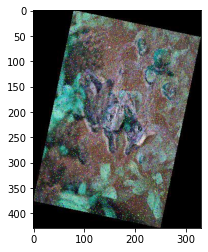

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt

#%matplotlib inline позволяет выводить графики matplotlib в Jupyter
plt.imshow(image)

In [8]:
blue_image = util.display_image('../images/blue_image.png')

In [9]:
blue_image[0, 0, :]

array([255,   0,   0], dtype=uint8)

In [10]:
rgb_blue_image = cv.cvtColor(blue_image, cv.COLOR_BGR2RGB)
rgb_blue_image[0, 0, :]

array([  0,   0, 255], dtype=uint8)

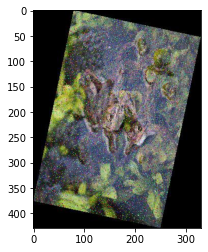

In [11]:
rgb_image = cv.cvtColor(image, cv.COLOR_BGR2RGB)
plt.imshow(rgb_image)

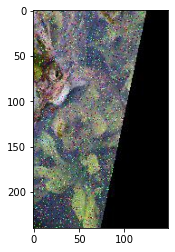

In [12]:
ROI = (182, 162, 220, 240)  #(x0, y0, height, width)
cropped_image = rgb_image[ROI[1]:ROI[1] + ROI[3], ROI[0]:ROI[0] + ROI[2]]
plt.imshow(cropped_image)

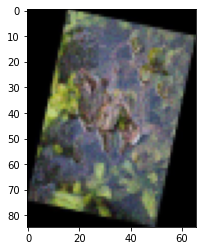

In [13]:
scale_percent = 20  # Процент от изначального размера
width = int(rgb_image.shape[1] * scale_percent / 100)
height = int(rgb_image.shape[0] * scale_percent / 100)
dim = (width, height)
resized_image = cv.resize(rgb_image, dim, interpolation=cv.INTER_AREA)
plt.imshow(resized_image)

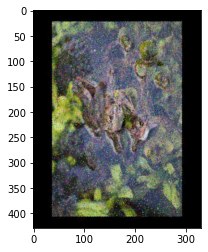

In [14]:
(h, w, d) = rgb_image.shape
angle = 12 # градусы
scale = 1.0
center = (w // 2, h // 2)
M = cv.getRotationMatrix2D(center, angle, scale)
rotated = cv.warpAffine(rgb_image, M, (w, h))
plt.imshow(rotated)

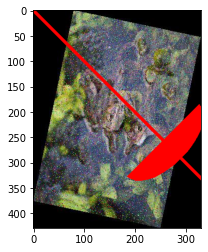

In [15]:
copy_image = rgb_image.copy()

# рисование линии
cv.line(copy_image, (0, 0), (511, 511), (255, 0, 0), 5)
# => Diagonal red line with thickness of 5 px

# Draw a rectangle using cv2.rectangle(image, topLeft, bottomRight, rgb, thinkness)
cv.rectangle(copy_image, (384, 0), (510, 128), (0, 255, 0), 3)
# => Green rectangle with thickness of 3 px

# Draw a circle using cv2.circle(image, center, radius, rgb, thinkness)
cv.circle(copy_image, (447, 63), 63, (0, 0, 255), -1)
# => Blue filled circle(note that the thinkness is -1)

# Draw a ellipse using cv2.ellipse(image, center, axes, angle, startAngle, endAngle, rgb, thinkness)
cv.ellipse(copy_image, (256, 256), (100, 50), -45, 0, 180, (255, 0, 0), -1)
# => Red wide down-half ellipse

plt.imshow(copy_image)

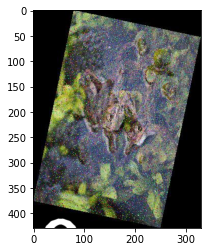

In [16]:
# Put some text using cv2.putText(image, text, bottomLeft, fontType, fontScale, rgb, thinkness, lineType)
copy_image = rgb_image.copy()
font = cv.FONT_HERSHEY_COMPLEX
cv.putText(rgb_image, 'OpenCV', (10, 500), font, 4, (255, 255, 255), 10, cv.LINE_AA)
# => White 'OpenCV' text at the bottom

plt.imshow(rgb_image)

In [17]:
%matplotlib inline
import matplotlib.pyplot as plt
import cv2 as cv
import numpy as np
from utility import util

# Изменим стандартный размер графиков matplotlib
plt.rcParams["figure.figsize"] = [6, 4]

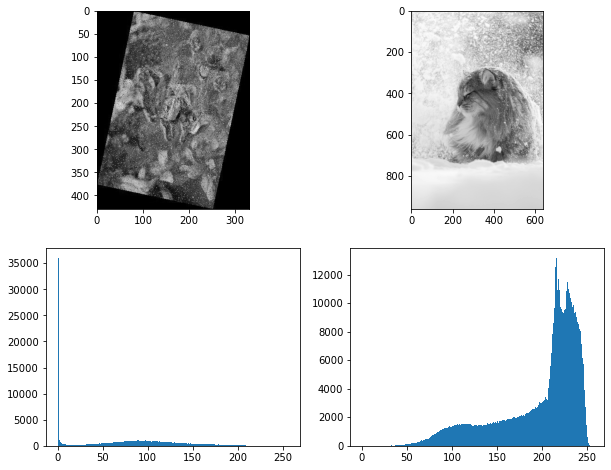

In [27]:
image1 = cv.imread('../images/lab2.jpg')
image2 = cv.imread('../images/winter_cat.png')
rgb_image1 = cv.cvtColor(image1, cv.COLOR_BGR2RGB)
rgb_image2 = cv.cvtColor(image2, cv.COLOR_BGR2RGB)
gray_image1 = cv.cvtColor(image1, cv.COLOR_BGR2GRAY)
gray_image2 = cv.cvtColor(image2, cv.COLOR_BGR2GRAY)

channels = [0]
histSize = [256]
rang = [0, 256]

hist1 = cv.calcHist([gray_image1], channels, None, histSize, rang)
hist2 = cv.calcHist([gray_image2], channels, None, histSize, rang)

gs = plt.GridSpec(2, 2)
plt.figure(figsize=(10, 8))
plt.subplot(gs[0])
plt.imshow(gray_image1, cmap='gray')
plt.subplot(gs[1])
plt.imshow(gray_image2, cmap='gray')
plt.subplot(gs[2])
plt.hist(gray_image1.reshape(-1), 256, rang)
plt.subplot(gs[3])
plt.hist(gray_image2.reshape(-1), 256, rang)
plt.show()

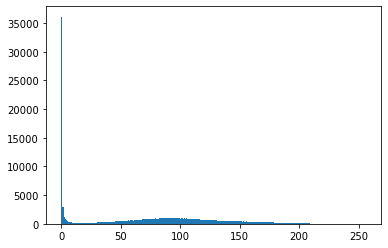

In [28]:
plt.hist(gray_image1.reshape(-1), 256, rang)
plt.show()

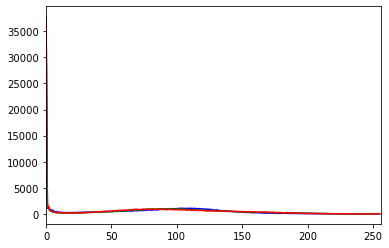

In [29]:
histSize = [256]
rang = [0, 256]


def plot_rgb_hist(image, histSize, rang):
    histSize = [256]
    rang = [0, 256]
    for i, col in enumerate(['b', 'g', 'r']):
        hist = cv.calcHist([image], [i], None, histSize, rang)
        plt.plot(hist, color=col)
        plt.xlim(rang)


plot_rgb_hist(image1, histSize, rang)
plt.show()

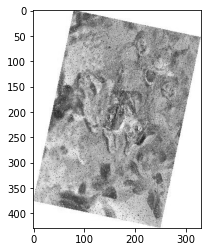

In [30]:
lut = lambda i: 255 - i
invert_image = lut(gray_image1)
plt.imshow(invert_image, cmap='gray')

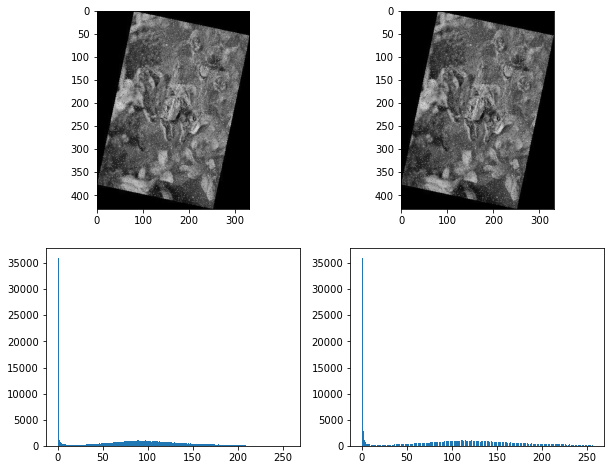

In [31]:
gamma = 1.05
lut = lambda i: i ** gamma
result_image = lut(gray_image1)

gs = plt.GridSpec(2, 2)
plt.figure(figsize=(10, 8))
plt.subplot(gs[0])
plt.imshow(gray_image1, cmap='gray')
plt.subplot(gs[1])
plt.imshow(result_image, cmap='gray')
plt.subplot(gs[2])
plt.hist(gray_image1.reshape(-1), 256, rang)
plt.subplot(gs[3])
plt.hist(result_image.reshape(-1), 256, rang)
plt.show()

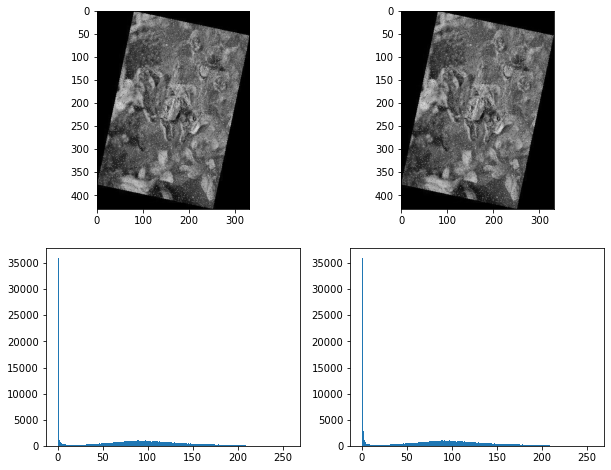

In [32]:
lut = lambda i: 255 * ((i - np.min(i)) / (np.max(i) - np.min(i)))
result_image = lut(gray_image1)

gs = plt.GridSpec(2, 2)
plt.figure(figsize=(10, 8))
plt.subplot(gs[0])
plt.imshow(gray_image1, cmap='gray')
plt.subplot(gs[1])
plt.imshow(result_image, cmap='gray')
plt.subplot(gs[2])
plt.hist(gray_image1.reshape(-1), 256, rang)
plt.subplot(gs[3])
plt.hist(result_image.reshape(-1), 256, rang)
plt.show()

In [34]:
equalize_image = lambda img: (255 * np.cumsum(cv.calcHist([img], [0], [0, 256], histSize=100)) / np.sum(cv.calcHist([img], [0], None, [256], [0, 256], histSize=100))).astype(np.uint8)[img]
result_image = equalize_image(gray_image1)

error: OpenCV(4.8.1) :-1: error: (-5:Bad argument) in function 'calcHist'
> Overload resolution failed:
>  - calcHist() missing required argument 'ranges' (pos 5)
>  - calcHist() missing required argument 'ranges' (pos 5)


In [ ]:
equalize_image = lambda i: (255 * np.cumsum(cv.calcHist([i], [0], [0, 256], histSize=100)) / np.sum(cv.calcHist([i], [0], None, [256], [0, 256], histSize=100))).astype(np.uint8)[im]
result_image = equalize_image(gray_image1)

In [37]:
def sum_i(i, hist):
    sum = 0
    for j in range(i):
        sum += hist[j]
    return sum
        
def sum_255(hist):
    sum = 0
    for j in range(255):
        sum += hist[j]   
    return sum

In [38]:
arr_sum = sum_255(hist1)

In [39]:
sum = 0
for j in range(255):
    sum += hist1[j]

In [40]:
result_image = gray_image1.copy()
for i in range(gray_image1.shape[0]):
    for j in range(gray_image1.shape[1]):
        result_image[i][j] = lut[gray_image1[i][j]]

TypeError: 'function' object is not subscriptable

In [ ]:
gs = plt.GridSpec(2, 2)
plt.figure(figsize=(10, 8))
plt.subplot(gs[0])
plt.imshow(gray_image1, cmap='gray')
plt.subplot(gs[1])
plt.imshow(result_image, cmap='gray')
plt.subplot(gs[2])
plt.hist(gray_image1.reshape(-1), 256, range1)
plt.subplot(gs[3])
plt.hist(result_image.reshape(-1), 256, range1)
plt.show()

In [ ]:
import numpy as np
import cv2 as cv
import sys

In [ ]:
def sum_i(i, hist):
    sum = 0
    for j in range(i):
        sum += hist[j]
    return sum
        
def sum_255(hist):
    sum = 0
    for j in range(255):
        sum += hist[j]   
    return sum

In [41]:
lut = np.ndarray(256)
arr_sum = sum_255(hist1)
for i in range(lut.size):
    lut[i] = 255 * sum_i(i, hist1) / arr_sum

C:\Users\IVAN\AppData\Local\Temp\ipykernel_13168\2581166124.py:4: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  lut[i] = 255 * sum_i(i, hist1) / arr_sum


In [ ]:
del list

In [ ]:
def sum_i(i, hist):
    sum = 0
    for j in range(i):
        sum += hist[j]
    return sum
        
def sum_255(hist):
    sum = 0
    for j in range(255):
        sum += hist[j]   
    return sum

In [ ]:
 hist1 = cv.calcHist([gray_image1], channels, None, histSize, range1)

In [19]:
range1 = [0, 256]

In [20]:
channels = [0]
histSize = [256]

In [21]:
def sum_i(i, hist):
    sum = 0
    for j in range(i):
        sum += hist[j]
    return sum
        
def sum_255(hist):
    sum = 0
    for j in range(255):
        sum += hist[j]   
    return sum

In [22]:
lut = np.ndarray(256)
arr_sum = sum_255(hist1)
for i in range(lut.size):
    lut[i] = 255 * sum_i(i, hist1) / arr_sum

NameError: name 'hist1' is not defined

In [23]:
 hist1 = cv.calcHist([gray_image1], channels, None, histSize, range1)

NameError: name 'gray_image1' is not defined

In [24]:
lut = np.ndarray(256)
arr_sum = sum_255(hist1)
for i in range(lut.size):
    lut[i] = 255 * sum_i(i, hist1) / arr_sum

NameError: name 'hist1' is not defined

In [25]:
arr_sum = sum_255(hist1)

NameError: name 'hist1' is not defined